In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load data

In [2]:
FILE_PATH = "../output/BD_mixsize/"
parameters = ['R_nought','infectious_time','transmission_rate','tree_size']

In [5]:
# Load data
latent = np.loadtxt(FILE_PATH+"latent_space.out",delimiter=",")
lf = ['LF{}'.format(i+1) for i in range(latent.shape[1])]

df = pd.DataFrame(data=latent,index=range(0,len(latent)),columns=lf)
for param in parameters:
    y = np.loadtxt(FILE_PATH+"y_{}.out".format(param),delimiter=",")
    df[param] = y[:,0]
df = df[parameters+lf]

## Lower dimensional representation of tree encodings in latent space

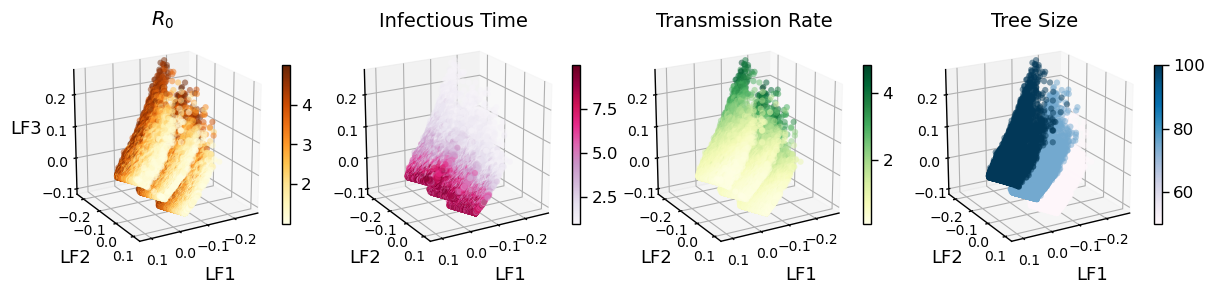

In [97]:
colors = ['YlOrBr', 'PuRd', 'YlGn','PuBu']
titles = ["$R_0$", "Infectious Time", "Transmission Rate", "Tree Size"]

fig = plt.figure(figsize=(15,3), dpi=100)
x = df[lf[0]]
y = df[lf[1]]
z = df[lf[2]]

for i,param in enumerate(parameters):

    cmap = sns.color_palette(colors[i], as_cmap=True)
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    
    col = df[param]

    p = ax.scatter3D(x, y, z, c=col, alpha=0.5, cmap=cmap, linewidth=0, edgecolor='k')
    ax.set_xlim(min(x),max(x))
    ax.set_ylim(min(y),max(y))
    ax.set_zlim(min(z),max(z))

    ax.set_xlabel(lf[0], fontsize=13, labelpad=2)
    ax.set_ylabel(lf[1], fontsize=13, labelpad=2)
    if i==0:
        ax.set_zlabel(lf[2], fontsize=13, labelpad=3)
    ax.tick_params(axis='x',pad=-1,labelsize=10)
    ax.tick_params(axis='y',pad=-1,labelsize=10)
    ax.tick_params(axis='z',pad=1,labelsize=10)
    ax.set_title(titles[i], fontsize=14, pad=-50)
    ax.view_init(20, 60)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(df[param].min(), df[param].max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, fraction=0.04, pad=0.02, ax=ax, shrink=.7)
    cbar.ax.tick_params(labelsize=12) 
    ax.set_box_aspect((1,1,1))
    
plt.subplots_adjust(wspace=0,hspace=0)

pass

# save
plt.savefig("../plots/latent_space_mixsize.pdf", bbox_inches='tight', format="pdf", dpi=50)

## Pairwise relationships between parameters of interest and latent factors 

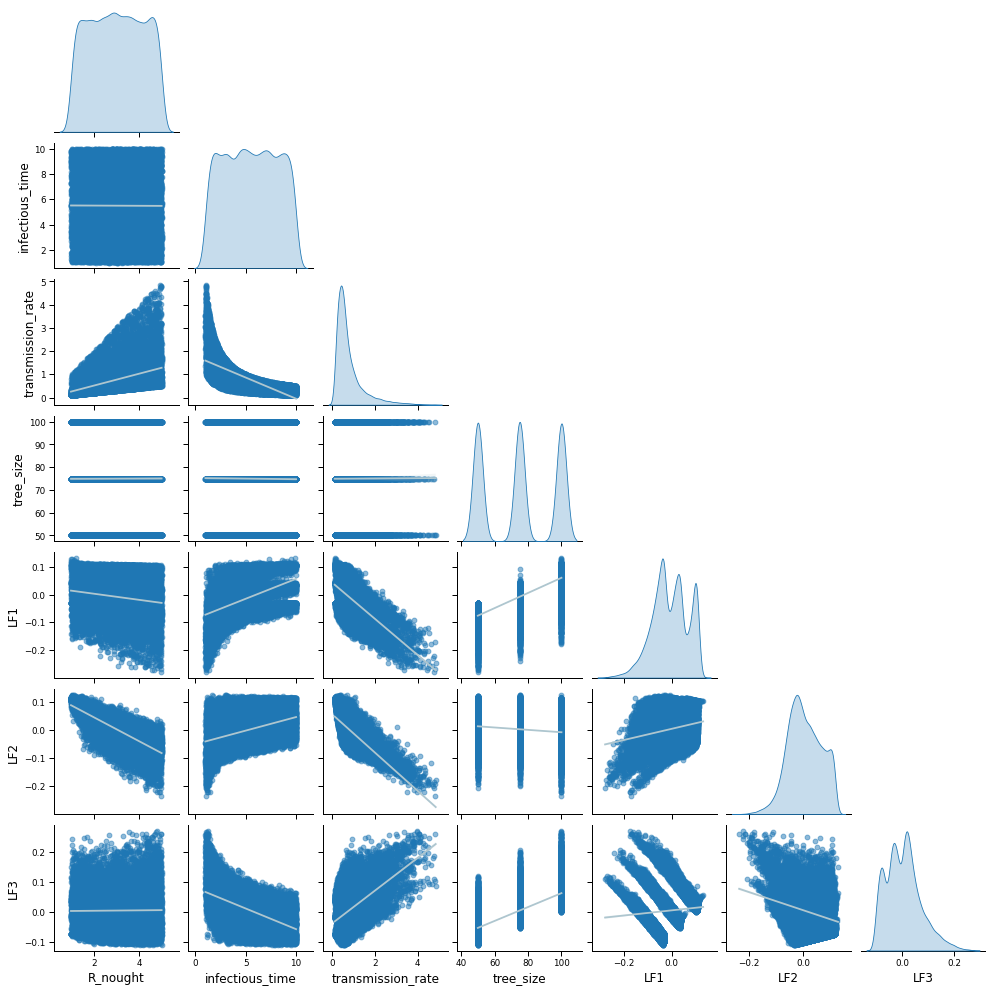

In [6]:
sns.set_context("paper", rc={"axes.labelsize":12})
sns_pp = sns.pairplot(df, kind='reg', diag_kind='kde', height=2, corner=True,
                      plot_kws={'line_kws':{'color':'#aec6cf'},'scatter_kws': {'alpha': 0.5}})
pass